# Short term breakout with RSI

## Import Library

In [9]:
import sys
sys.path.append('../../')

In [10]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import ATR
from util.SMA import SMA
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from Breakout_RSI import Breakout_RSI


## Get Data

In [11]:
XAUUSD = load_data()

In [12]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

```python
class SMA_crossover(Strategy) :
    ATR_SL = 0.5
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['sma_fast'] = SMA(self.data.df,50,200)['sma_fast']
    def next(self):

        pre_sma_fast = self.data.df.loc[self.data.df.index[-2], 'sma_fast']
        pre_sma_low = self.data.df.loc[self.data.df.index[-2], 'sma_slow']
        current_sma_fast = self.data.df.loc[self.data.df.index[-1], 'sma_fast']
        current_sma_low = self.data.df.loc[self.data.df.index[-1], 'sma_slow']
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']

        if  pre_sma_fast < pre_sma_low and current_sma_fast >= current_sma_low and  not self.position :
            tp = self.data.Close + current_ATR * self.ATR_SL
            sl = self.data.Close - current_ATR * self.ATR_SL
            # Place your buy logic here
            self.buy(sl=sl, tp=tp, size=1)

        if pre_sma_fast > pre_sma_low and current_sma_fast <= current_sma_low and not self.position:
            tp = self.data.Close - current_ATR * self.ATR_SL
            sl = self.data.Close + current_ATR * self.ATR_SL
               
            self.sell(sl=sl, tp=tp, size=1)
```

In [18]:
strategy = Breakout_RSI

In [14]:
account_size = 20000

# Backtest each time frame

## TF D1

In [23]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

ValueError: Long orders require: SL (nan) < LIMIT (612.759) < TP (nan)

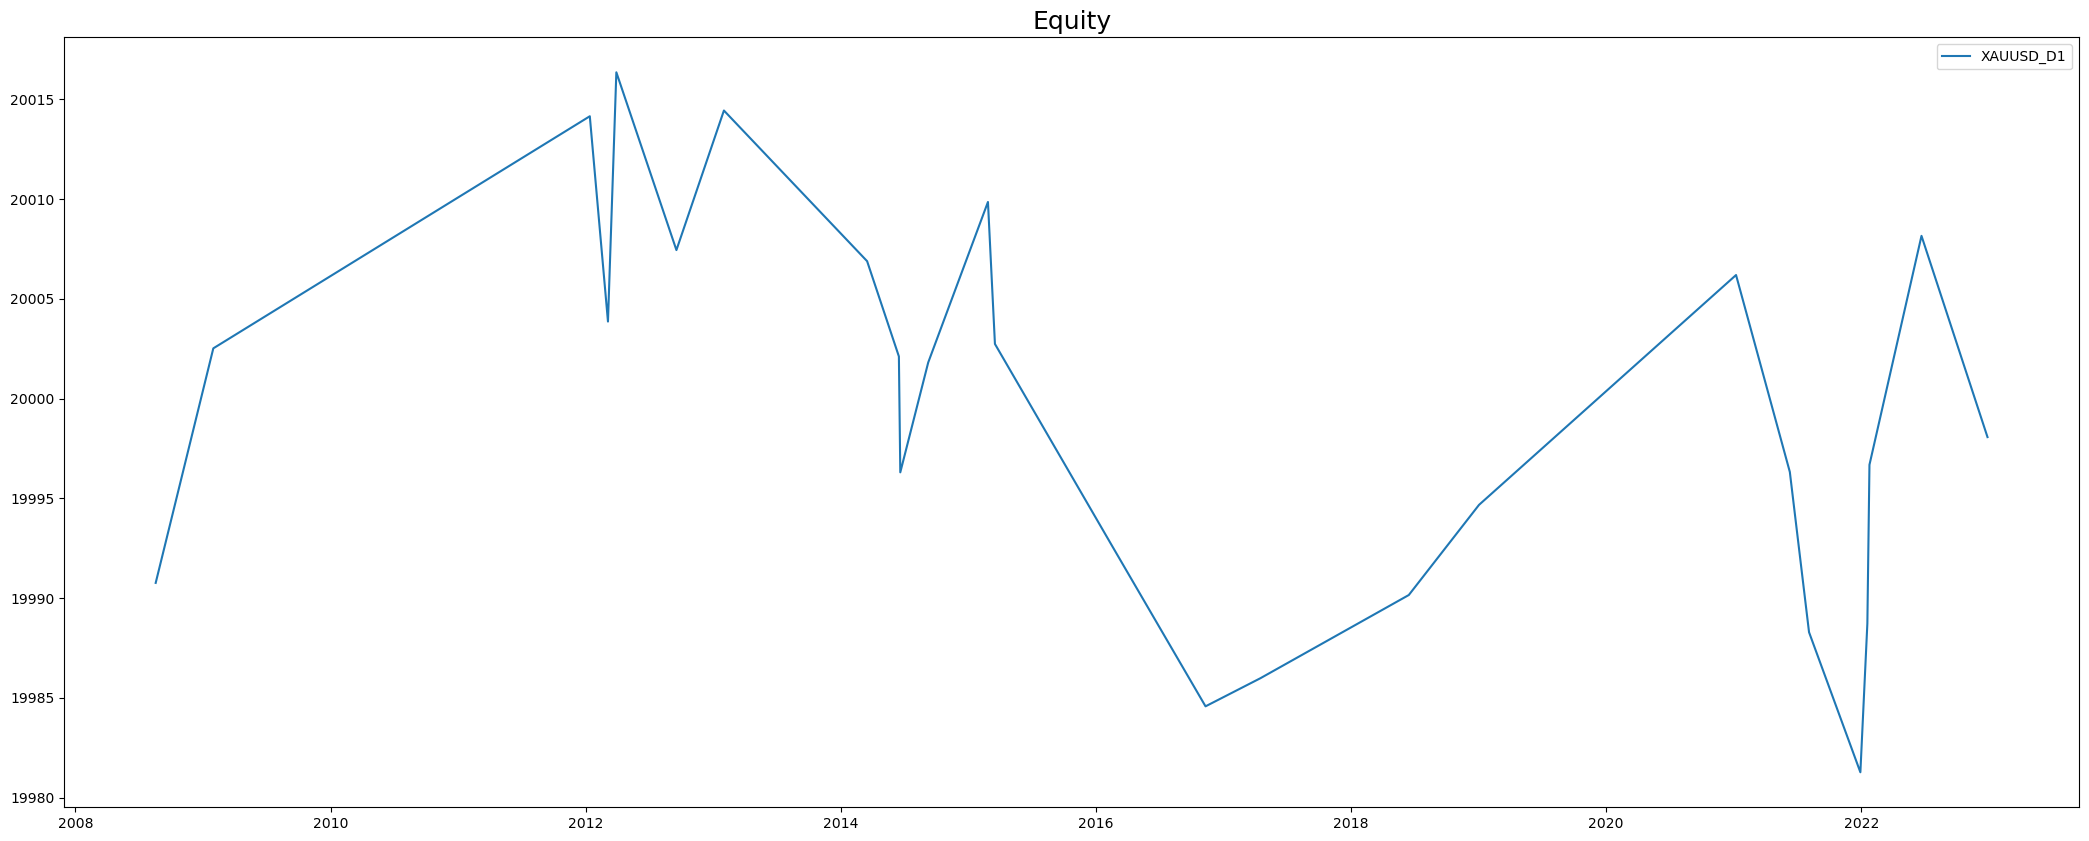

In [ ]:
plot_equity_trades(result_D1['_trades'],'XAUUSD_D1' , account_size)

## TF H4

In [24]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    4.877579
Equity Final [$]                  19701.70415
Equity Peak [$]                    20005.0993
Return [%]                          -1.491479
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.075063
Volatility (Ann.) [%]                0.129838
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.840734
Avg. Drawdown [%]                   -0.923975
Max. Drawdown Duration     5898 days 12:00:00
Avg. Drawdown Duration     2949 days 12:00:00
# Trades                                  794
Win Rate [%]                        44.206549
Best Trade [%]                       1.000252
Worst Trade [%]                     -1.404893
Avg. Trade [%]                    

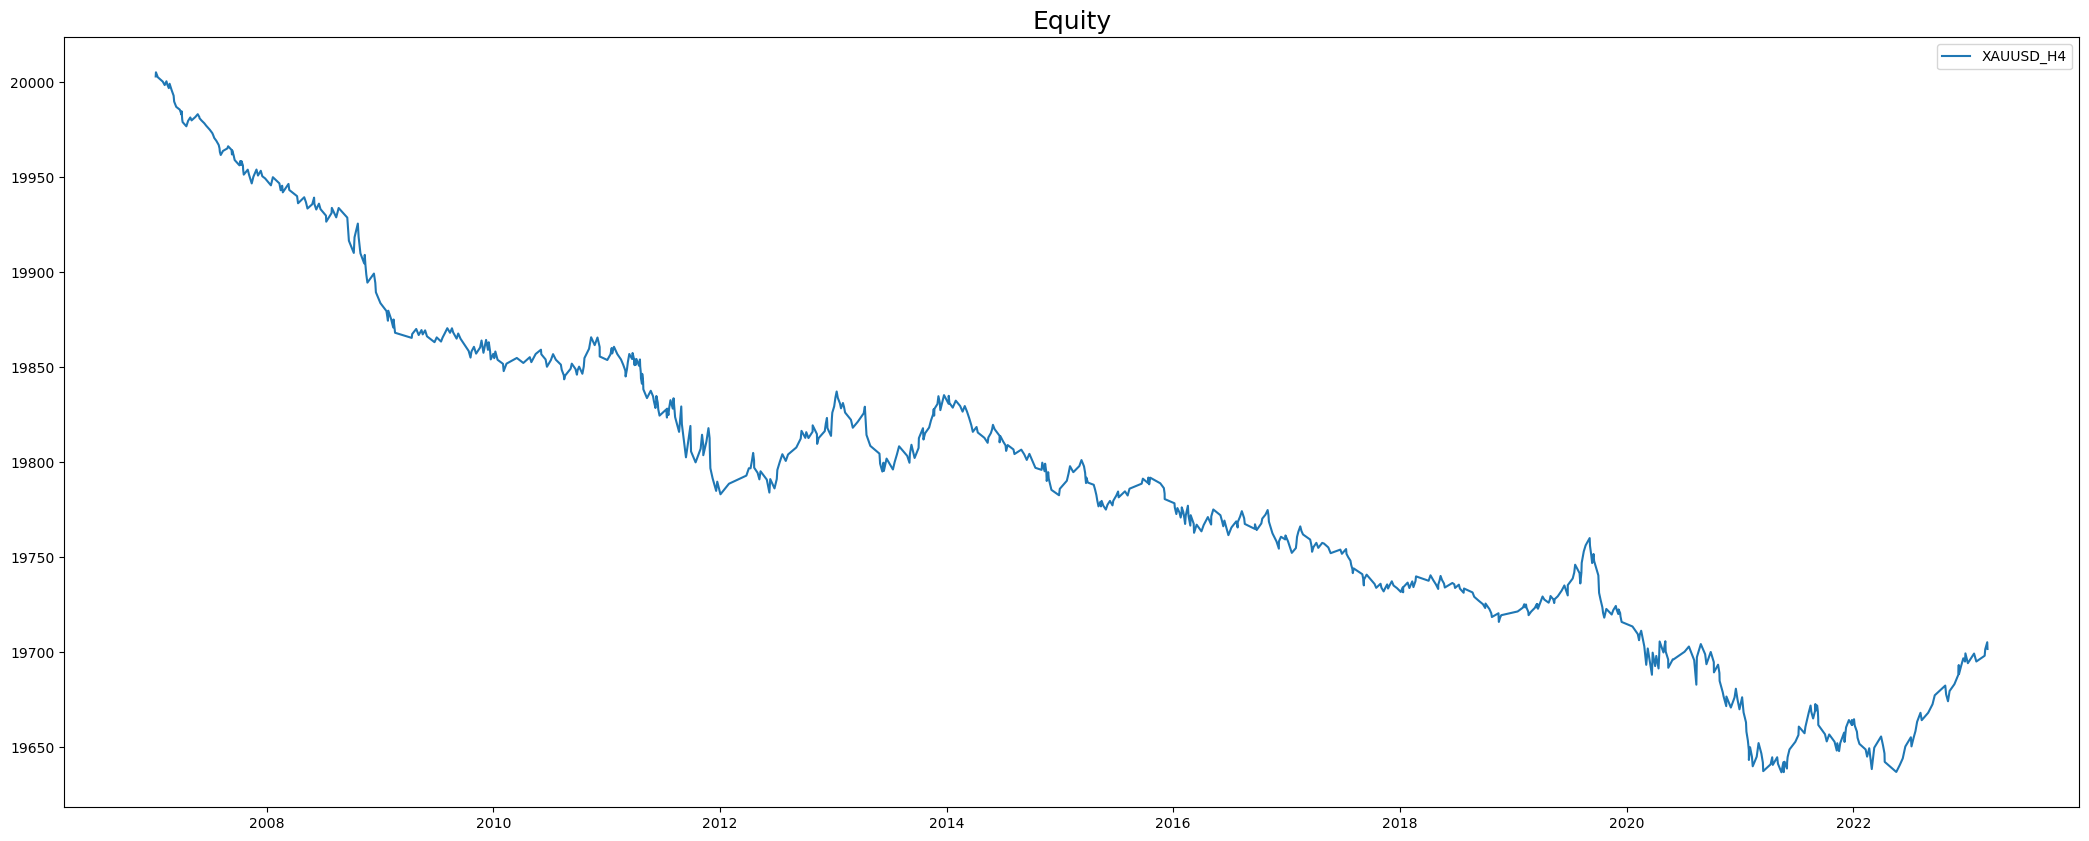

In [25]:
plot_equity_trades(result_H4['_trades'], 'XAUUSD_H4' , account_size)

## TF H1

In [26]:
Backtest_H1 = Backtest(XAUUSD['H1'], Strategy,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

ValueError: Short orders require: TP (nan) < LIMIT (635.813) < SL (nan)

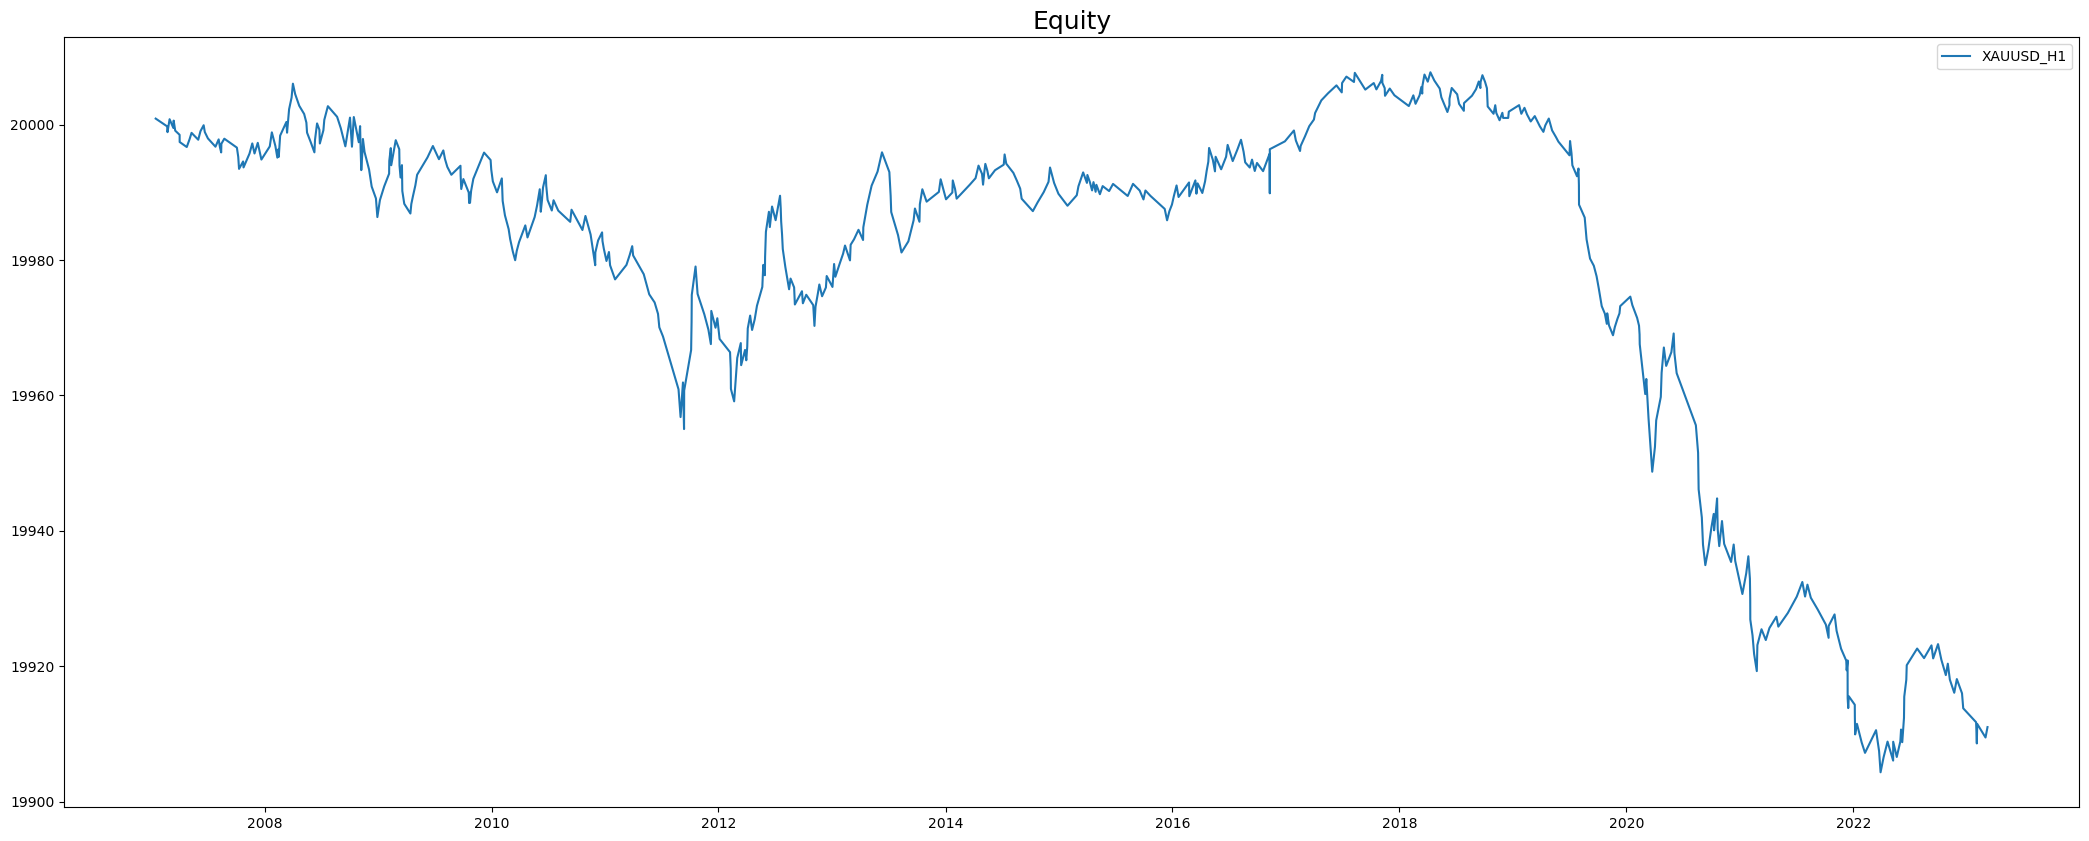

In [ ]:
plot_equity_trades(result_H1['_trades'], 'XAUUSD_H1', account_size)

## TF M30 

In [28]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                    5.958399
Equity Final [$]                   19572.8873
Equity Peak [$]                  20006.301875
Return [%]                          -2.135563
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                   -0.107812
Volatility (Ann.) [%]                0.134063
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -2.177575
Avg. Drawdown [%]                   -0.576865
Max. Drawdown Duration     5539 days 23:30:00
Avg. Drawdown Duration     1476 days 19:15:00
# Trades                                 5973
Win Rate [%]                        46.693454
Best Trade [%]                       0.548635
Worst Trade [%]                     -0.563103
Avg. Trade [%]                    

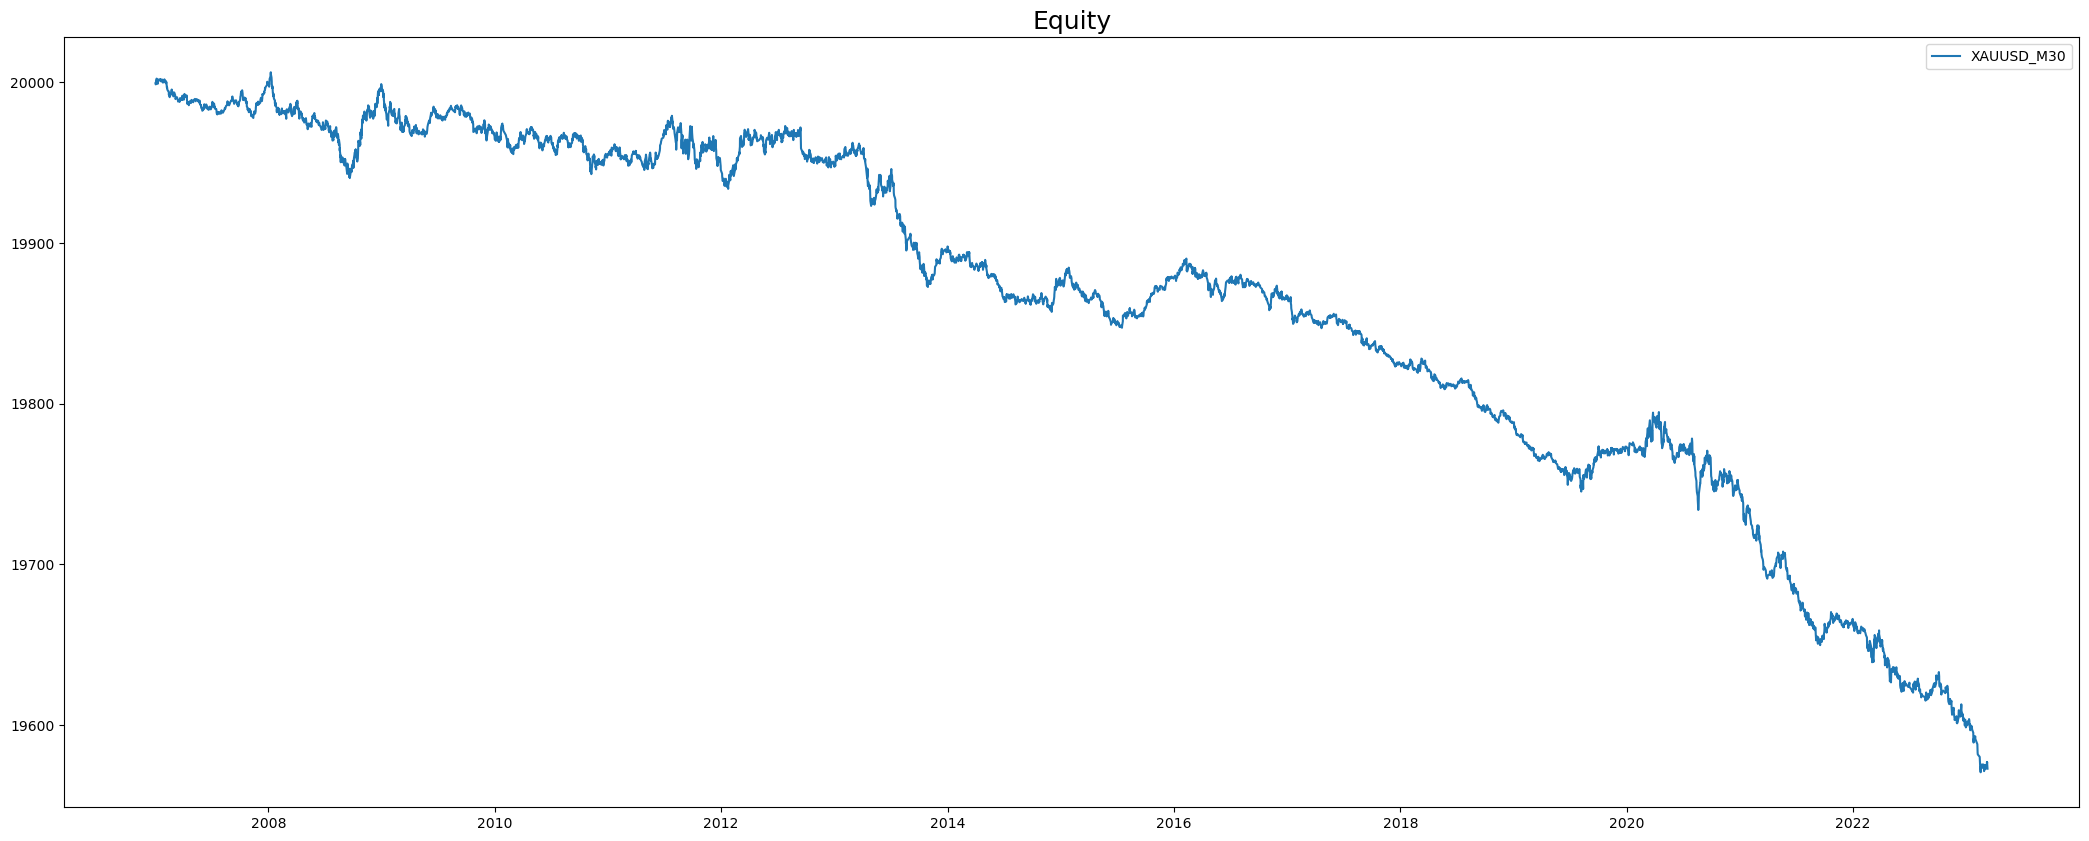

In [29]:
plot_equity_trades(result_M30['_trades'], 'XAUUSD_M30', account_size)